<a href="https://colab.research.google.com/github/kairamilanifitria/UAS-AIPR-2221210065-Kaira-Milani-Fitria/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)  #reshape
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

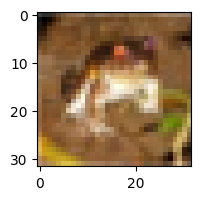

In [ ]:
# test for showing the data
plt.figure(figsize = (15,2))  # setting the display image size
plt.imshow(X_train[0]) # show the data [0]

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
# plot some images to see what they are

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

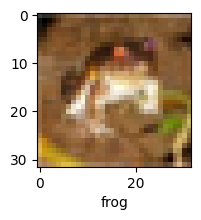

In [ ]:
plot_sample(X_train, y_train, 0)

### Normalize data ###

In [ ]:
# normalize data
# divide each value by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

## Build ANN ##

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),  # flatten the layer
        layers.Dense(3000, activation='relu'),  # two deep layers, first have 3000 neurons with Relu activation
        layers.Dense(1000, activation='relu'),  # second deep layers have 1000 neurons with Relu activation
        layers.Dense(10, activation='sigmoid')  # other layer has 10 categories with sigmoid activation
    ])

In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8157 - accuracy: 0.3544 - val_loss: 1.6604 - val_accuracy: 0.4266
Epoch 2/5
1563/1563 [==============================] - 77s 50ms/step - loss: 1.6238 - accuracy: 0.4270 - val_loss: 1.7887 - val_accuracy: 0.3807
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5435 - accuracy: 0.4574 - val_loss: 1.5572 - val_accuracy: 0.4429
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4823 - accuracy: 0.4797 - val_loss: 1.5162 - val_accuracy: 0.4653
Epoch 5/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4330 - accuracy: 0.4974 - val_loss: 1.5046 - val_accuracy: 0.4630


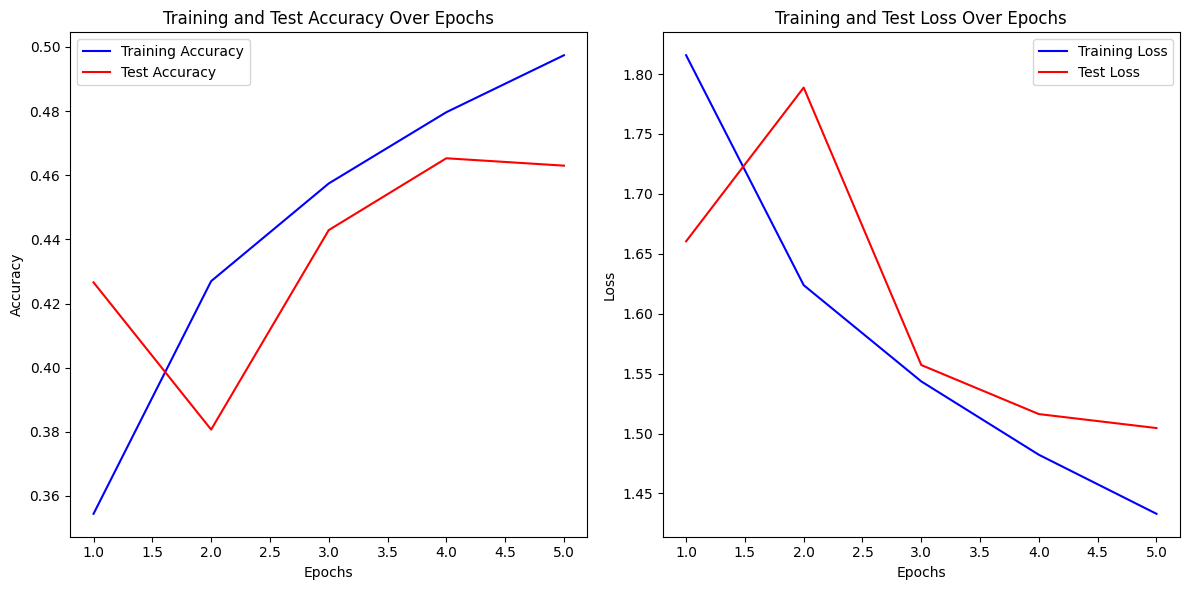

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored
history = ann.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Extracting training and test accuracy, training and test loss
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plotting accuracy and loss over epochs
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.5046 - accuracy: 0.4630


[1.5045697689056396, 0.46299999952316284]

313/313 [==============================] - 6s 20ms/step


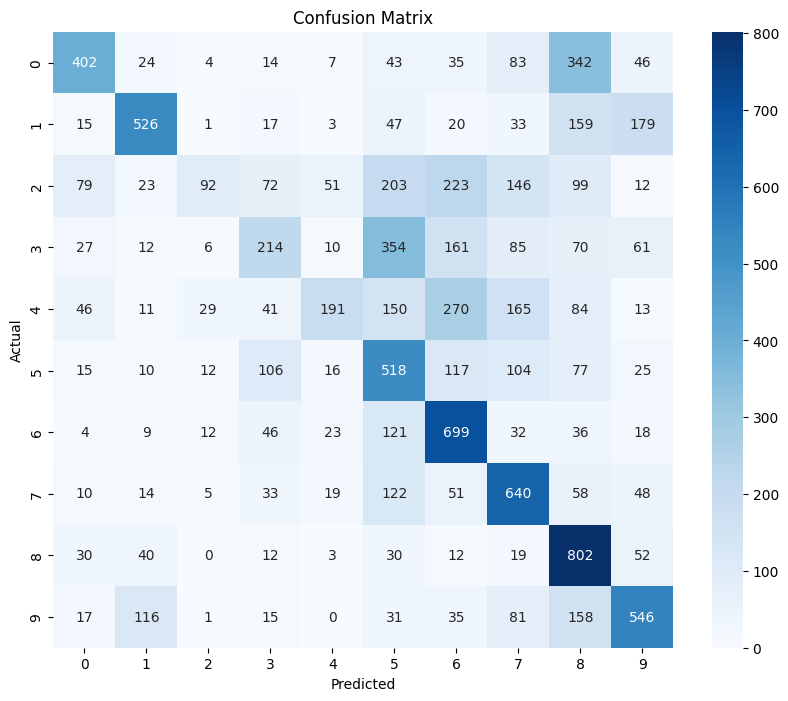

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model (cnn) and test data (X_test, y_test) available
y_pred = ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Detailed report
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49      1000
           1       0.67      0.53      0.59      1000
           2       0.57      0.09      0.16      1000
           3       0.38      0.21      0.27      1000
           4       0.59      0.19      0.29      1000
           5       0.32      0.52      0.40      1000
           6       0.43      0.70      0.53      1000
           7       0.46      0.64      0.54      1000
           8       0.43      0.80      0.56      1000
           9       0.55      0.55      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000

